# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a df with city names and empty columns to fill

city_data = pd.DataFrame({"City": cities})
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Humidity"] = ""
city_data["Cloudiness"] = ""
city_data["Wind Speed"] = ""
city_data["Country"] = ""
city_data["Date"] = ""

# Base URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL (inside a for loop)

for index, row in city_data.iterrows():

    city_to_look_up = row["City"]
    units = "imperial"

    query_url = f"{base_url}appid={weather_api_key}&q={city_to_look_up}&units={units}"

    # Request JSON data
    json_data = requests.get(query_url).json()
    
    try:
        print(f"Retrieving data for city #{index + 1}: {city_to_look_up.title()}...")
        city_data.loc[index, "Lat"] = float(json_data['coord']['lat'])
        city_data.loc[index, "Lng"] = float(json_data['coord']['lon'])
        city_data.loc[index, "Max Temp"] = float(json_data['main']['temp_max'])
        city_data.loc[index, "Humidity"] = float(json_data['main']['humidity'])
        city_data.loc[index, "Cloudiness"] = float(json_data['clouds']['all'])
        city_data.loc[index, "Wind Speed"] = float(json_data['wind']['speed'])
        city_data.loc[index, "Country"] = json_data['sys']['country']
        city_data.loc[index, 'Date'] = json_data['dt']
    except (KeyError, IndexError):
        print(f"Data not found for #{index + 1}: {city_to_look_up.title()}. Skipping...")
        
    time.sleep(1)

print("Data retrieval complete!")

Retrieving data for city #1: Butaritari...
Retrieving data for city #2: Hithadhoo...
Retrieving data for city #3: Wladyslawowo...
Retrieving data for city #4: Khatanga...
Retrieving data for city #5: Cockburn Town...
Retrieving data for city #6: Namatanai...
Retrieving data for city #7: Bubaque...
Retrieving data for city #8: Merritt Island...
Retrieving data for city #9: Jumla...
Retrieving data for city #10: Rikitea...
Retrieving data for city #11: Okha...
Retrieving data for city #12: Dingle...
Retrieving data for city #13: Hobart...
Retrieving data for city #14: Hermanus...
Retrieving data for city #15: Chuy...
Retrieving data for city #16: Fare...
Retrieving data for city #17: Touros...
Retrieving data for city #18: Andra...
Retrieving data for city #19: Mataura...
Retrieving data for city #20: Geraldton...
Retrieving data for city #21: Longyearbyen...
Retrieving data for city #22: Upernavik...
Retrieving data for city #23: Punta Arenas...
Retrieving data for city #24: Vaini...
Re

Retrieving data for city #173: Tsihombe...
Data not found for #173: Tsihombe. Skipping...
Retrieving data for city #174: Sosnovo...
Retrieving data for city #175: Gaogou...
Retrieving data for city #176: Ahuimanu...
Retrieving data for city #177: Altay...
Retrieving data for city #178: Bulawayo...
Retrieving data for city #179: Provideniya...
Retrieving data for city #180: Ruteng...
Retrieving data for city #181: Lata...
Retrieving data for city #182: San Cristobal...
Retrieving data for city #183: Chicama...
Retrieving data for city #184: Mahebourg...
Retrieving data for city #185: Leninskoye...
Retrieving data for city #186: Minden...
Retrieving data for city #187: Soloneshnoye...
Retrieving data for city #188: Saint-Pierre...
Retrieving data for city #189: Iqaluit...
Retrieving data for city #190: Erenhot...
Retrieving data for city #191: Solvychegodsk...
Retrieving data for city #192: Todos Santos...
Retrieving data for city #193: Zhigansk...
Retrieving data for city #194: Pevek...

Retrieving data for city #344: Kudahuvadhoo...
Retrieving data for city #345: Poso...
Retrieving data for city #346: Alta Floresta...
Retrieving data for city #347: Tuggurt...
Data not found for #347: Tuggurt. Skipping...
Retrieving data for city #348: Mareeba...
Retrieving data for city #349: Mayumba...
Retrieving data for city #350: Carlsbad...
Retrieving data for city #351: Brae...
Retrieving data for city #352: Pocone...
Retrieving data for city #353: Balabac...
Retrieving data for city #354: Sao Joao Da Barra...
Retrieving data for city #355: Coquimbo...
Retrieving data for city #356: Hualmay...
Retrieving data for city #357: Voh...
Retrieving data for city #358: Ardistan...
Data not found for #358: Ardistan. Skipping...
Retrieving data for city #359: Copiapo...
Retrieving data for city #360: Toliary...
Data not found for #360: Toliary. Skipping...
Retrieving data for city #361: Jalu...
Retrieving data for city #362: Polyarnyy...
Retrieving data for city #363: Chara...
Retrieving 

Retrieving data for city #517: Vardo...
Retrieving data for city #518: Coyuca...
Data not found for #518: Coyuca. Skipping...
Retrieving data for city #519: Sao Sebastiao...
Retrieving data for city #520: Dawlatabad...
Retrieving data for city #521: Sainte-Rose...
Retrieving data for city #522: Zhanakorgan...
Retrieving data for city #523: Richards Bay...
Retrieving data for city #524: Chagda...
Data not found for #524: Chagda. Skipping...
Retrieving data for city #525: Nicoya...
Retrieving data for city #526: Apastovo...
Retrieving data for city #527: Bud...
Retrieving data for city #528: Capaci...
Retrieving data for city #529: Presque Isle...
Retrieving data for city #530: Rivadavia...
Retrieving data for city #531: Wagar...
Retrieving data for city #532: Olinda...
Retrieving data for city #533: Severnoye...
Retrieving data for city #534: Nantucket...
Retrieving data for city #535: Esperance...
Retrieving data for city #536: Gamba...
Retrieving data for city #537: Vitim...
Retrievin

In [4]:
# Drop cities with empty observations present after data retrieval
no_empty_cities = city_data.loc[city_data["Lat"] != ""]
no_empty_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.79,81.23,77,44,8.99,KI,1613234978
1,Hithadhoo,-0.6,73.0833,82.94,74,82,12.3,MV,1613234980
2,Wladyslawowo,54.7909,18.4009,30,68,0,14.97,PL,1613234981
3,Khatanga,71.9667,102.5,-29.67,85,82,9.33,RU,1613234982
4,Cockburn Town,21.4612,-71.1419,78.21,77,0,19.53,TC,1613234983
...,...,...,...,...,...,...,...,...,...
599,Biak,-0.9131,122.877,76.82,79,100,2.64,ID,1613235687
600,Khilok,51.3674,110.468,-14.37,84,19,3.33,RU,1613235688
602,Bennettsville,34.6174,-79.6848,43,93,90,9.22,US,1613235691
603,Silifke,36.3778,33.9344,57.99,66,55,1.77,TR,1613235692


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Transform "object" numeric columns to float
city_data = no_empty_cities.convert_dtypes()

# Transform "Date" column into a readable datetime format
city_data["Date"] = pd.to_datetime(city_data["Date"], unit = "s")

# Verify data types
city_data.dtypes

City                  string
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity               Int64
Cloudiness             Int64
Wind Speed           float64
Country               string
Date          datetime64[ns]
dtype: object

In [6]:
# Obtain the date of data extraction
date_of_study = city_data["Date"].mean()
date_of_study = date_of_study.date()

datetime.date(2021, 2, 13)

In [7]:
# Verify using describe()
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,20.153314,15.022145,49.280257,72.541284,54.299083,8.274642
std,34.222190,92.003267,35.001311,19.685081,39.195500,6.331258
min,-54.800000,-175.200000,-40.000000,8.000000,0.000000,0.220000
25%,-9.012200,-65.102300,25.810000,65.000000,15.000000,3.440000
50%,24.316700,18.400900,61.140000,77.000000,71.000000,6.910000
75%,51.023900,97.522800,78.580000,86.000000,90.000000,11.180000
max,78.218600,179.316700,105.800000,100.000000,100.000000,42.570000


In [8]:
# Store into a .csv file and display
city_data.to_csv(output_data_file)
city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.23,77,44,8.99,KI,2021-02-13 16:49:38
1,Hithadhoo,-0.6000,73.0833,82.94,74,82,12.30,MV,2021-02-13 16:49:40
2,Wladyslawowo,54.7909,18.4009,30.00,68,0,14.97,PL,2021-02-13 16:49:41
3,Khatanga,71.9667,102.5000,-29.67,85,82,9.33,RU,2021-02-13 16:49:42
4,Cockburn Town,21.4612,-71.1419,78.21,77,0,19.53,TC,2021-02-13 16:49:43
5,Namatanai,-3.6667,152.4333,79.63,82,100,5.88,PG,2021-02-13 16:49:44
6,Bubaque,11.2833,-15.8333,79.20,70,0,13.94,GW,2021-02-13 16:49:45
7,Merritt Island,28.5392,-80.6720,80.01,94,90,17.27,US,2021-02-13 16:49:46
8,Jumla,29.2747,82.1838,39.06,71,13,3.58,NP,2021-02-13 16:49:48
9,Rikitea,-23.1203,-134.9692,79.41,76,1,13.82,PF,2021-02-13 16:49:49


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

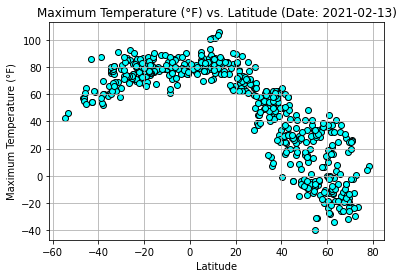

In [9]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title(f"Maximum Temperature (°F) vs. Latitude (Date: {date_of_study})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
plt.savefig("output_data/TempVsLat.png")
plt.show()

This graph displays a clear tendency for the temperature to increase the closer the latitude is to the Equator (0 degrees latitude). The maximum temperature decreases slightly as the latitude decreases and it greatly decreases as the latitude increases. This is attributed to the season pattern difference between the southern hemisphere (latitude < 0) and the northern hemisphere (latitude > 0).

## Humidity vs. Latitude Plot

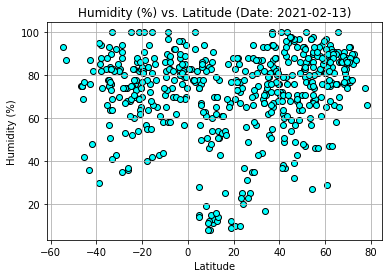

In [10]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title(f"Humidity (%) vs. Latitude (Date: {date_of_study})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/HumidityVsLat.png")
plt.show()

Looking at the humidity vs. latitude scatterplot, a clear correlation or trend between these two variables is not observed. 

## Cloudiness vs. Latitude Plot

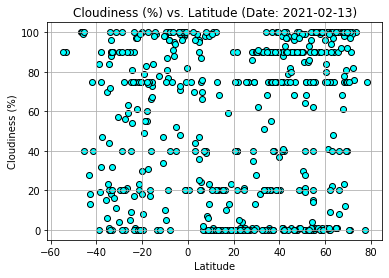

In [11]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title(f"Cloudiness (%) vs. Latitude (Date: {date_of_study})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CloudinessVsLat.png")
plt.show()

Cloudiness and latitude, as the previous plot, are not clearly correlated when looking at a scatterplot representing them.

## Wind Speed vs. Latitude

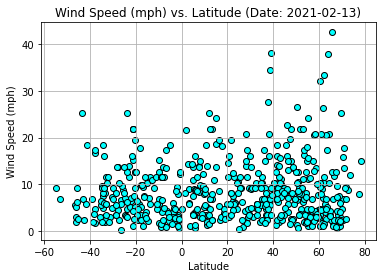

In [12]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title(f"Wind Speed (mph) vs. Latitude (Date: {date_of_study})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/WindSpeedVsLat.png")
plt.show()

This presents a similar behavior to cloudiness and humidity related to latitude. There is no clear correlation between wind speed and latitude.

## Linear Regression

In [13]:
# Break down the dataset into northern hemisphere and southern hemisphere cities

northern_cities = city_data.loc[city_data["Lat"] >= 0]
southern_cities = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7701


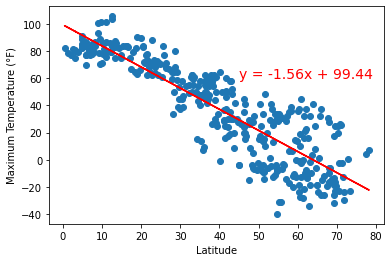

In [14]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (45, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3087


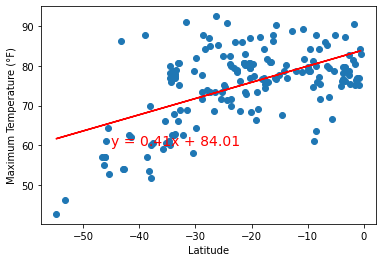

In [22]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-45, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# show the plot
plt.show()

These linear regressions, when analyzed, show:

1. A strong negative correlation between northern hemisphere latitudes and temperature. 
2. A weaker positive correlation between southern hemisphere latitudes and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1622


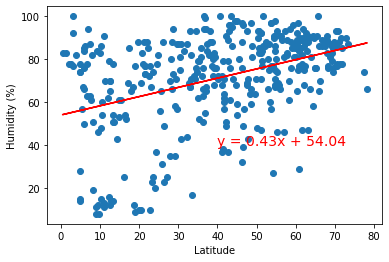

In [16]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (40, 40), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0133


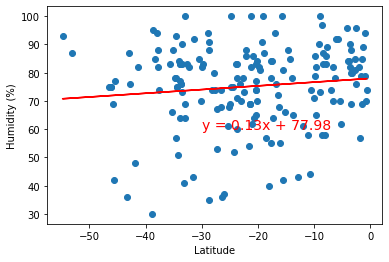

In [17]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-30, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Show the plot
plt.show()

When analyzing the effect of latitude in humidity, we can appreciate two trends:

1. There is a weak positive correlation between northern hemisphere latitude and humidity. 
2. There is a very weak positive correlation between southern hemisphere latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0761


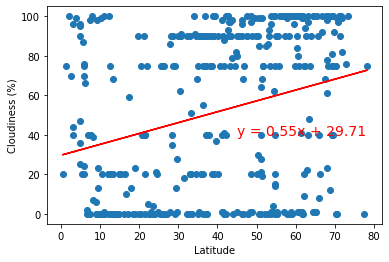

In [18]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (45, 40), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0532


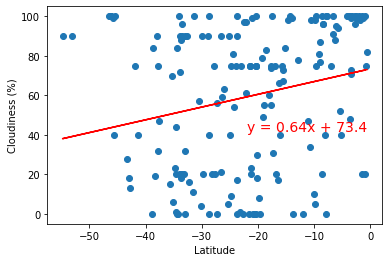

In [19]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-22, 42), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

Both hemispheres show a positive correlation between cloudiness and latitude. However, the correlations are not strong.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002


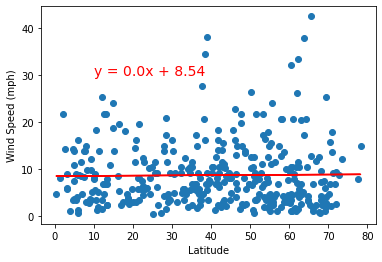

In [20]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (10, 30), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0087


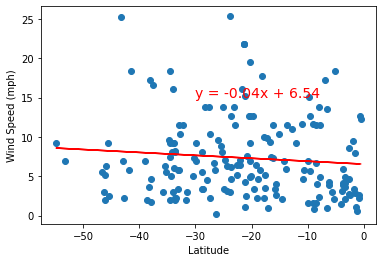

In [21]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-30, 15), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

When wind speed and latitude are analyzed using a linear regression, you can appreciate:

1. There is a positive correlation between northern hemisphere cities' wind speed and latitude.
2. There is a negative correlation between southern hemisphere cities' wind speed and latitude.
 
However, both correlations are very weak, since their R-squared values are close to 0.

## Conclusions

1. Temperatures in the northern hemisphere cities are strongly correlated to their latitude. It is also a negative correlation (the further north the latitude of the city, the lower the temperature is going to be for that city). By contrast, the southern hemisphere cities have a temperature vs. latitude positive correlation (the further south the latitude of the city, the lower the temperature is for that city). 
2. Temperatures in the southern hemisphere are currently in a narrower range of temperatures than temperatures in the northern hemisphere, which could be explained by the fact the northern hemisphere is currently in its last month of meteorological winter, while the southern hemisphere is currently in its last month of meteorological summer.
3. Other meteorological variables like cloudiness, wind speed and humidity do not have significant correlations when compared against latitude. They are independent from latitude.